In [91]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
pd.options.display.max_columns = None

In [92]:
twitter = pd.read_csv("./TwitterHate.csv")

In [93]:
twitter.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [94]:
twitter.shape

(31962, 3)

In [95]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [96]:
twitter.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [97]:
twitter.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [98]:
twitter.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [99]:
# drop the id 
twitter.drop('id', axis = 1, inplace = True)

In [100]:
twitter.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [101]:
# check any tweets 

twitter.iloc[25000]

label                                                    0
tweet    waiting for a only moment!  #wait #blessed #my...
Name: 25000, dtype: object

In [102]:
df = twitter.copy()

In [103]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


## Data Cleaning

### 1. Normalize Text  (Diacritics)

In [104]:
def simplify(text):
    '''Function to handle the diacritics in the text'''
    import unicodedata
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)

In [105]:
df['twitter'] = df['tweet'].apply(simplify)

In [106]:
df

,label,tweet,twitter
0,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,ate @user isz that youuu?ai
31958,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,...","@user #sikh #temple vandalised in in #calgary,..."


### 2. Remove Users Handles (@)

In [107]:
sample = "and @user5 you discuss with @user9 with another @username3"
pattern = re.compile(r'@\w+')
re.findall(pattern,sample)

['@user5', '@user9', '@username3']

In [108]:
#remove all the user handles --> strings starting with @
df['tweet'].replace(r'@\w+','',regex=True,inplace=True)

In [109]:
twitter.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


### 3.Remove the urls

In [110]:
sample = "https://www.afexltd.com and https://www.afexcommoditymarket.com"
pattern = re.compile(r'http\S+')
re.findall(pattern,sample)

['https://www.afexltd.com', 'https://www.afexcommoditymarket.com']

In [111]:
df['tweet'].replace(r'http\S+','',regex=True,inplace=True)

In [112]:
df.head()

,label,tweet,twitter
0,0,when a father is dysfunctional and is so sel...,@user when a father is dysfunctional and is s...
1,0,thanks for #lyft credit i can't use cause th...,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation


In [113]:
sample = 'wonderfl :-)  when are you coming for #party'
tweet_tokenize = TweetTokenizer(preserve_case=True)
tweet_tokenize.tokenize(sample)

['wonderfl', ':-)', 'when', 'are', 'you', 'coming', 'for', '#party']

In [114]:
tokenizer = TweetTokenizer(preserve_case=True)
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [115]:
df.head()

,label,tweet,twitter
0,0,"[when, a, father, is, dysfunctional, and, is, ...",@user when a father is dysfunctional and is s...
1,0,"[thanks, for, #lyft, credit, i, can't, use, ca...",@user @user thanks for #lyft credit i can't us...
2,0,"[bihday, your, majesty]",bihday your majesty
3,0,"[#model, i, love, u, take, with, u, all, the, ...",#model i love u take with u all the time in ...
4,0,"[factsguide, :, society, now, #motivation]",factsguide: society now #motivation


#### 5. Remove # symbols while retaining the text

In [116]:
#try tremoving # symbols from a sample text
sample = '#afex #commodity market'
pattern = re.compile(r'#')
re.sub(pattern,'',sample)

'afex commodity market'

In [117]:
def remove_hashsymbols(text):
    '''Function to remove the hashtag symbol from the text'''
    pattern = re.compile(r'#')
    text = ' '.join(text)
    clean_text = re.sub(pattern,'',text)
    return tokenizer.tokenize(clean_text) 

In [118]:
df['tweet'] = df['tweet'].apply(remove_hashsymbols)

In [119]:
df.head()

,label,tweet,twitter
0,0,"[when, a, father, is, dysfunctional, and, is, ...",@user when a father is dysfunctional and is s...
1,0,"[thanks, for, lyft, credit, i, can't, use, cau...",@user @user thanks for #lyft credit i can't us...
2,0,"[bihday, your, majesty]",bihday your majesty
3,0,"[model, i, love, u, take, with, u, all, the, t...",#model i love u take with u all the time in ...
4,0,"[factsguide, :, society, now, motivation]",factsguide: society now #motivation


In [120]:
df.drop('twitter', axis = 1, inplace = True)

In [121]:
df.head()

,label,tweet
0,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,0,"[thanks, for, lyft, credit, i, can't, use, cau..."
2,0,"[bihday, your, majesty]"
3,0,"[model, i, love, u, take, with, u, all, the, t..."
4,0,"[factsguide, :, society, now, motivation]"


#### 6. Remove single and double length characters

In [122]:
def rem_shortwords(text):
    '''Function to remove the short words of length 1 and 2 characters'''
    '''Arguments: 
       text: string
       returns: string without containing words of length 1 and 2'''
    lengths = [1,2]
    new_text = ' '.join(text)
    for word in text:
        text = [word for word in tokenizer.tokenize(new_text) if not len(word) in lengths]
        
    return new_text       
    

In [123]:
df['tweet'] = df['tweet'].apply(rem_shortwords)

In [124]:
df.head()

,label,tweet
0,0,when a father is dysfunctional and is so selfi...
1,0,thanks for lyft credit i can't use cause they ...
2,0,bihday your majesty
3,0,model i love u take with u all the time in urð...
4,0,factsguide : society now motivation


In [125]:
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [126]:
df.head(3)

,label,tweet
0,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,0,"[thanks, for, lyft, credit, i, can't, use, cau..."
2,0,"[bihday, your, majesty]"


#### 7. Remove Digits

In [127]:
def rem_digits(text):
    '''Function to remove the digits from the list of strings'''
    no_digits = []
    for word in text:
        no_digits.append(re.sub(r'\d','',word))
    return ' '.join(no_digits)   

In [128]:
df['tweet'] = df['tweet'].apply(rem_digits)

In [129]:
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [130]:
df.head()

,label,tweet
0,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,0,"[thanks, for, lyft, credit, i, can't, use, cau..."
2,0,"[bihday, your, majesty]"
3,0,"[model, i, love, u, take, with, u, all, the, t..."
4,0,"[factsguide, :, society, now, motivation]"


#### 8. Remove Special Characters

In [131]:
def rem_nonalpha(text):
    '''Function to remove the non-alphanumeric characters from the text'''
    text = [word for word in text if word.isalpha()]
    return text

In [132]:
#remove the non alpha numeric characters from the tweet tokens
df['tweet'] = df['tweet'].apply(rem_nonalpha)

In [133]:
df.head()

,label,tweet
0,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,0,"[thanks, for, lyft, credit, i, use, cause, the..."
2,0,"[bihday, your, majesty]"
3,0,"[model, i, love, u, take, with, u, all, the, t..."
4,0,"[factsguide, society, now, motivation]"


### Exploratory Analysis

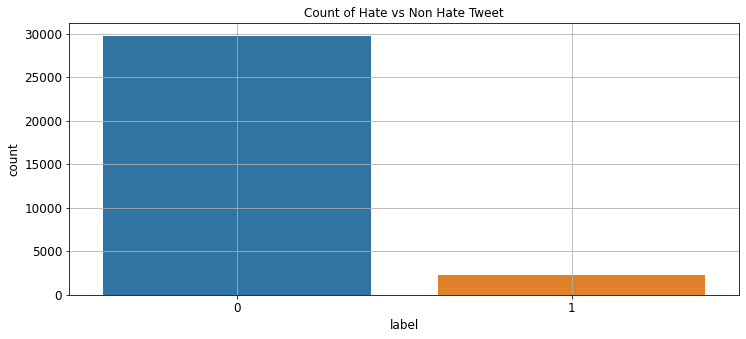

In [134]:
sns.countplot(df['label'])
plt.title('Count of Hate vs Non Hate Tweet')
plt.grid()
plt.show()

#### 0-------> Non Hatespeeches
#### 1-------> Hatespeach
##### There are more non hatespeeches than hatespeech in the dataset

In [135]:
from collections import Counter

In [136]:
results = Counter()
df['tweet'].apply(results.update)
#print the top 10 most common terms in the tweet 
print(results.most_common(10))

[('ð', 15681), ('the', 10197), ('to', 9842), ('a', 6495), ('i', 5836), ('you', 5456), ('and', 4916), ('in', 4654), ('â', 4544), ('for', 4498)]


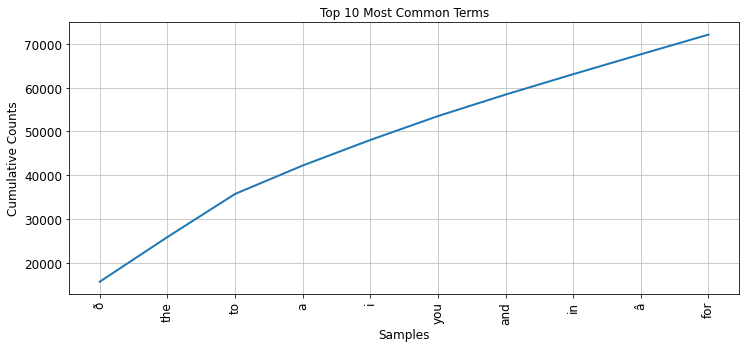

In [137]:
#plot the cumulative frequency of the top 10 most common tokens 
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=True)
plt.show()

## Predictive Modeling

In [138]:
df.head()

,label,tweet
0,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,0,"[thanks, for, lyft, credit, i, use, cause, the..."
2,0,"[bihday, your, majesty]"
3,0,"[model, i, love, u, take, with, u, all, the, t..."
4,0,"[factsguide, society, now, motivation]"


In [139]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x))

In [140]:
df.head()

,label,tweet
0,0,when a father is dysfunctional and is so selfi...
1,0,thanks for lyft credit i use cause they offer ...
2,0,bihday your majesty
3,0,model i love u take with u all the time in urð...
4,0,factsguide society now motivation


### Split the data into X and Y

In [141]:
X = df['tweet']
Y = df['label']

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
seed = 51
test_size = 0.2 #20% of the data in the 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=seed,stratify=df['label'])
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(25569,) (6393,) (25569,) (6393,)


### tfidf vectorizer model

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [145]:
vectorizer = TfidfVectorizer(max_features=5000)

In [146]:
#fit on the training data
X_train = vectorizer.fit_transform(X_train)
#transform the test data
X_test = vectorizer.transform(X_test)

In [147]:
#check the shape
X_train.shape, X_test.shape

((25569, 5000), (6393, 5000))

#### Model building: Ordinary Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [149]:
clf = LogisticRegression()
clf.fit(X_train,Y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

### Model Evaluation

In [150]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [151]:
print('Accuracy Score on training set %.5f' %accuracy_score(Y_train,train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(Y_test,test_predictions))

Accuracy Score on training set 0.95487
Accuracy Score on test set 0.94760


In [152]:
print('Classification Report Training set')
print('\n')
print(classification_report(Y_train,train_predictions))

Classification Report Training set


              precision    recall  f1-score   support

           0       0.95      1.00      0.98     23775
           1       0.95      0.38      0.54      1794

    accuracy                           0.95     25569
   macro avg       0.95      0.69      0.76     25569
weighted avg       0.95      0.95      0.95     25569



In [153]:
print('Classification Report Testing set')
print('\n')
print(classification_report(Y_test,test_predictions))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5945
           1       0.88      0.29      0.44       448

    accuracy                           0.95      6393
   macro avg       0.91      0.64      0.71      6393
weighted avg       0.94      0.95      0.94      6393



### Weighted Logistic Regression Or Cost Sensitive Logistic Regression

In [154]:
#define the weight of the class labels using inverse ratio
weights = {0:1.0,1:13.0}

#instantiate the logistic regression model and account for the weights to be applied for model coefficients update magnitude
clf = LogisticRegression(solver='lbfgs',class_weight=weights)

#fit and predict
clf.fit(X_train,Y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

#classification report
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(Y_train,train_predictions))
print('\n')

print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(Y_test,test_predictions))

Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

           0       1.00      0.95      0.97     23775
           1       0.58      0.98      0.73      1794

    accuracy                           0.95     25569
   macro avg       0.79      0.96      0.85     25569
weighted avg       0.97      0.95      0.95     25569



Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5945
           1       0.47      0.77      0.58       448

    accuracy                           0.92      6393
   macro avg       0.73      0.85      0.77      6393
weighted avg       0.95      0.92      0.93      6393



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Regularization and Hyperparameter tuning:

In [155]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from scipy.stats import loguniform

In [156]:
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

In [157]:
print(space)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000212978668E0>}


In [158]:
#define the model with balanced class weights
weights = {0:1.0,1:1.0}
clf = LogisticRegression(class_weight=weights)
#define the number of folds 
folds = StratifiedKFold(n_splits=4,random_state=None)
# define search
grid_search = RandomizedSearchCV(estimator=clf,param_distributions=space, n_iter=100, scoring='recall',
                            n_jobs=-1, cv=folds, random_state=seed)
#fit grid search on the train data
grid_result = grid_search.fit(X_train,Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.1923185         nan 0.         0.                nan        nan
        nan 0.                nan        nan        nan 0.
 0.51951012 0.                nan 0.         0.36846514        nan
 0.57356999 0.56521064        nan 0.59196404 0.17336144        nan
        nan 0.                nan        nan 0.         0.
        nan 0.51058652        nan        nan        nan        nan
        nan        nan 0.         0.         0.                nan
 0.                nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.19510992        nan
        nan        nan        nan 0.                nan        nan
 0.53064846        nan 0.         0.         0.                nan
        nan        nan        nan        nan 0.60756418        nan
        nan        nan        nan 0.         0.00167286 0.
        nan

In [159]:
grid_result.best_estimator_

LogisticRegression(C=20.867237575208833, class_weight={0: 1.0, 1: 1.0},
                   penalty='l1', solver='liblinear')

In [160]:
clf = LogisticRegression(C=23.871926754399514,penalty='l1',solver='liblinear',class_weight=weights)

In [161]:
#fit and predict
clf.fit(X_train,Y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

#classification report
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(Y_train,train_predictions))
print('\n')

print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(Y_test,test_predictions))

Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23775
           1       0.98      0.94      0.96      1794

    accuracy                           0.99     25569
   macro avg       0.99      0.97      0.98     25569
weighted avg       0.99      0.99      0.99     25569



Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5945
           1       0.64      0.58      0.61       448

    accuracy                           0.95      6393
   macro avg       0.81      0.78      0.79      6393
weighted avg       0.95      0.95      0.95      6393



In [162]:
#use the class weights to handle the imbalance in the labels
weights = {0:1.0,1:13}

clf = LogisticRegression(class_weight=weights)
#define the number of folds 
folds = StratifiedKFold(n_splits=4,random_state= None)
# define search
grid_search = RandomizedSearchCV(estimator=clf,param_distributions=space, n_iter=100, scoring='recall',
                            n_jobs=-1, cv=folds, random_state=seed)
#fit grid search on the train data
grid_result = grid_search.fit(X_train,Y_train)

#retrieve the best model 
grid_result.best_estimator_

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.77814414        nan 0.54460806 0.05184015        nan        nan
        nan 0.73802274        nan        nan        nan 0.20960145
 0.71736547 0.60481004        nan 0.         0.7608674         nan
 0.67556375 0.68281076        nan 0.67891445 0.77702931        nan
        nan 0.56745894        nan        nan 0.21685094 0.08863695
        nan 0.72294086        nan        nan        nan        nan
        nan        nan 0.57024414 0.44316736 0.77703677        nan
 0.50613964        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.76142295        nan
        nan        nan        nan 0.                nan        nan
 0.70789875        nan 0.44540571 0.11873857 0.                nan
        nan        nan        nan        nan 0.6655303         nan
        nan        nan        nan 0.         0.6878467

LogisticRegression(C=0.16731783677034165, class_weight={0: 1.0, 1: 13},
                   solver='liblinear')

In [163]:
#instantiate the best model
clf = LogisticRegression(C=0.16731783677034165,penalty='l2',solver='liblinear',class_weight=weights)

#fit and predict
clf.fit(X_train,Y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

#classification report
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(Y_train,train_predictions))
print('\n')

print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(Y_test,test_predictions))


Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

           0       0.99      0.93      0.96     23775
           1       0.48      0.93      0.64      1794

    accuracy                           0.93     25569
   macro avg       0.74      0.93      0.80     25569
weighted avg       0.96      0.93      0.94     25569



Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

           0       0.98      0.92      0.95      5945
           1       0.42      0.80      0.55       448

    accuracy                           0.91      6393
   macro avg       0.70      0.86      0.75      6393
weighted avg       0.94      0.91      0.92      6393



In [164]:
from sklearn.metrics import plot_confusion_matrix

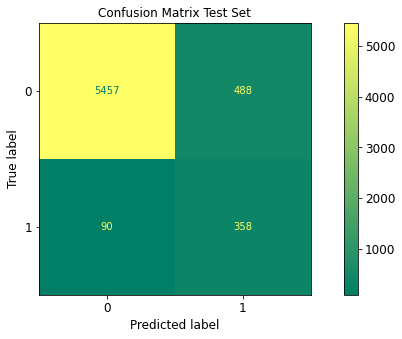

In [165]:
plot_confusion_matrix(clf,X_test,Y_test,cmap='summer')
plt.title('Confusion Matrix Test Set')
plt.show()

In [166]:
import pickle

In [167]:
with open('clf_pickle','wb') as f:
    pickle.dump(clf,f)

In [168]:
with open('clf_pickle','rb') as f:
    mp = pickle.load(f)

In [172]:
with open('vectorizer_pickle','wb') as f:
    pickle.dump(vectorizer,f)

In [173]:
with open('vectorizer_pickle','rb') as f:
    cp = pickle.load(f)